In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [ ]:
X_train.isnull().mean()

,0
Age,0.196629
Fare,0.050562
Family,0.000000


In [ ]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)
X_train['fare_999'] = X_train['Fare'].fillna(999)
X_train['fare_minus1'] = X_train['Fare'].fillna(-1)

In [ ]:
X_train.head()

,Age,Fare,Family,Age_99,Age_minus1,fare_999,fare_minus1
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750


# **Check Variance Age**

In [ ]:
print('Original Age Variable Variance:',X_train['Age'].var())
print('Age Variance after mean Imputation:',X_train['Age_99'].var())
print('Age Variance after median Imputation:',X_train['Age_minus1'].var())

Original Age Variable Variance: 210.2517072477438
Age Variance after mean Imputation: 932.9665366701436
Age Variance after median Imputation: 315.99550362600644


# **Check Variance Fare**

In [ ]:
print('Original Fare Variable Variance:',X_train['Fare'].var())
print('Fare Variance after mean Imputation:',X_train['fare_999'].var())
print('Fare Variance after median Imputation:',X_train['fare_minus1'].var())

Original Fare Variable Variance: 2761.031434948639
Fare Variance after mean Imputation: 47525.47059536007
Fare Variance after median Imputation: 2675.2394049177087


# **Check Age PDI plot**

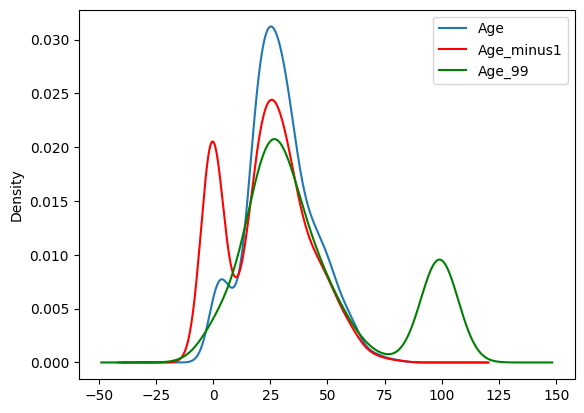

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Age'].plot(kind='kde',ax=ax)
# Variable imputed with the median

X_train['Age_minus1'].plot(kind='kde',ax=ax,color='red')

# Variable imputed with the mean
X_train['Age_99'].plot(kind='kde',ax=ax,color='green')
#add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# **Check Fare PDI plot**

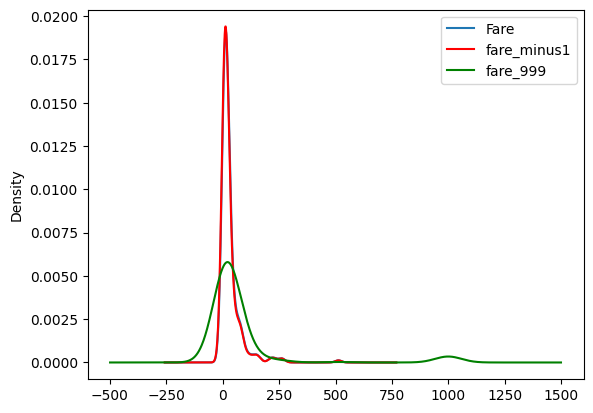

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Fare'].plot(kind='kde',ax=ax)
# Variable imputed with the median

X_train['fare_minus1'].plot(kind='kde',ax=ax,color='red')

# Variable imputed with the mean
X_train['fare_999'].plot(kind='kde',ax=ax,color='green')
#add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [ ]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,fare_999,fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305
fare_999,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817
fare_minus1,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405


In [ ]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,fare_999,fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.046016,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.067792,0.135159
fare_999,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357
fare_minus1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.094357,1.000000


# **Check Age Outliers**

<Axes: >

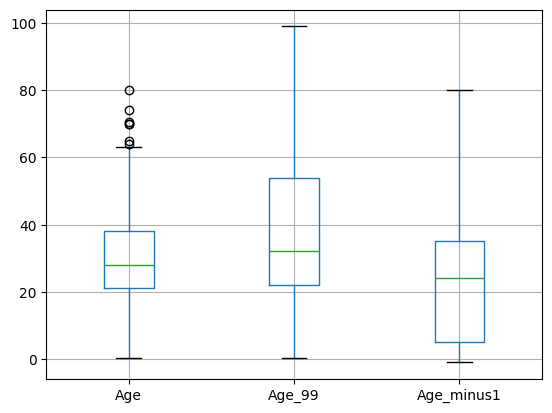

In [ ]:
X_train[['Age','Age_99','Age_minus1']].boxplot()

# **Check Fare Outliers**

<Axes: >

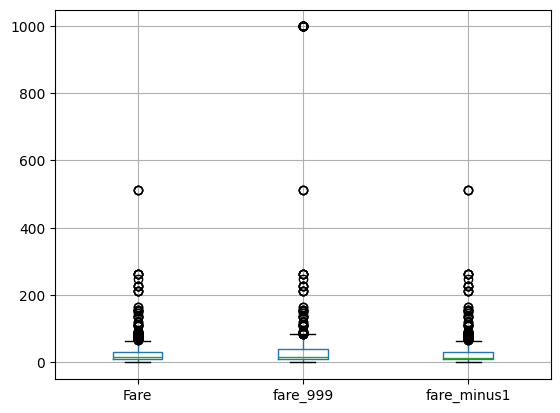

In [ ]:
X_train[['Fare','fare_999','fare_minus1']].boxplot()

# **Using Sklearn**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [ ]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [ ]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [ ]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])